### You will learn:
1. Naive Bayes
2. Decison Tree
3. Intro to Bagging
    - Random Forest
    - Extra Trees
4. Grid Search
5. Randomized Grid Search

##### Data Importing

In [1]:
# Import the diabetes dataset
import pandas as pd
diabetes = pd.read_csv('data/diabetes.csv')
# View the head
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Check info
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# Cheak Class 'Outcome' wieght
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

##### Data Splitting

In [4]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Import Evaluation metrics
from sklearn import metrics

In [5]:
# Split the Data into predictiors and outcome
X = diabetes.drop('Outcome', axis=1).values
y = diabetes['Outcome'].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y )


### Naive Bayes


It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [6]:
# Import Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
# Intiate the model
naivebayes = GaussianNB()
# Fit the model
naivebayes.fit(X_train, y_train)


GaussianNB()

In [7]:
# We can use the concept of cross validation here also 
from sklearn.model_selection import cross_validate

In [8]:
cv_results = pd.DataFrame(cross_validate(naivebayes, X, y, cv=4, return_train_score = True, scoring=('accuracy', 'precision', 'recall', 'f1')))
cv_results

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.000997,0.002730,0.770833,0.777778,0.694915,0.706215,0.611940,0.621891,0.650794,0.661376
1,0.000000,0.000000,0.713542,0.769097,0.600000,0.688889,0.537313,0.616915,0.566929,0.650919
2,0.000000,0.000000,0.755208,0.751736,0.666667,0.654255,0.597015,0.611940,0.629921,0.632391
3,0.000997,0.002641,0.765625,0.767361,0.677419,0.691429,0.626866,0.601990,0.651163,0.643617


In [9]:
# Adjust display presion
pd.set_option("display.precision", 8)

# Using of predict 
naivebayes_predict = naivebayes.predict(X_test)
# Using of predict_proba
naivebayes_predict_proba = naivebayes.predict_proba(X_test)
# Generate a Dataframe
results = pd.DataFrame({'Actual': y_test.tolist(), 
                      'Predicted Class': naivebayes_predict.tolist(), 
                      'Predicted Class Probapitiy': naivebayes_predict_proba[:, 1].tolist()})

In [10]:
# Print the head of the Actual vs. Predicted DataFrame
results.head(10)

,Actual,Predicted Class,Predicted Class Probapitiy
0,1,1,0.62009941
1,0,0,0.24265830
2,0,0,0.02945577
3,1,0,0.38027083
4,1,1,0.98436575
5,0,0,0.04155780
6,0,0,0.17213001
7,0,0,0.06079198
8,0,1,0.53797327
9,0,0,0.00983573


### Decision Tree
It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [11]:
# Import the Model 
from sklearn.tree import DecisionTreeClassifier

# Split the Data into predictiors and outcome
X = diabetes.drop('Outcome', axis=1).values
y = diabetes['Outcome'].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y )

# Intiate the model
dtree = DecisionTreeClassifier()

# Fitting the Model 
dtree.fit(X_train, y_train)

# Predict for testing
dtree_predict = dtree.predict(X_test)

# Print the accuracy
print('Decision Tree accuracy: ', metrics.accuracy_score(y_test, dtree_predict))


Decision Tree accuracy:  0.7395833333333334


Text(0.5, 257.44, 'Predicted label')

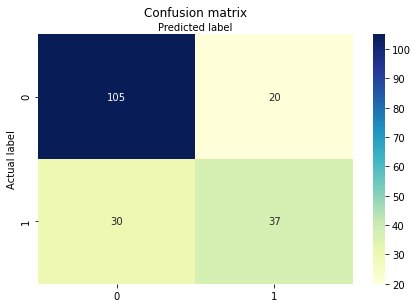

In [12]:
# Let's call the confusion matrix method
cnf_matrix = metrics.confusion_matrix(y_test, dtree_predict)
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
cv_results = pd.DataFrame(cross_validate(dtree, X, y, cv=4, return_train_score = True, scoring=('accuracy', 'precision', 'recall', 'f1')))
cv_results

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.00324559,0.00378895,0.69791667,1.0,0.58490566,1.0,0.46268657,1.0,0.51666667,1.0
1,0.00546312,0.00423980,0.65625000,1.0,0.50847458,1.0,0.44776119,1.0,0.47619048,1.0
2,0.00725031,0.00498819,0.73437500,1.0,0.63333333,1.0,0.56716418,1.0,0.59842520,1.0
3,0.00302792,0.00346732,0.73958333,1.0,0.63076923,1.0,0.61194030,1.0,0.62121212,1.0


### Intro to Bagging

Bootstrap Aggregation (or Bagging for short), is a simple and very powerful ensemble method.

An ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model.

Bootstrap Aggregation is a general procedure that can be used to reduce the variance for those algorithm that have high variance. An algorithm that has high variance are decision trees, like classification and regression trees.
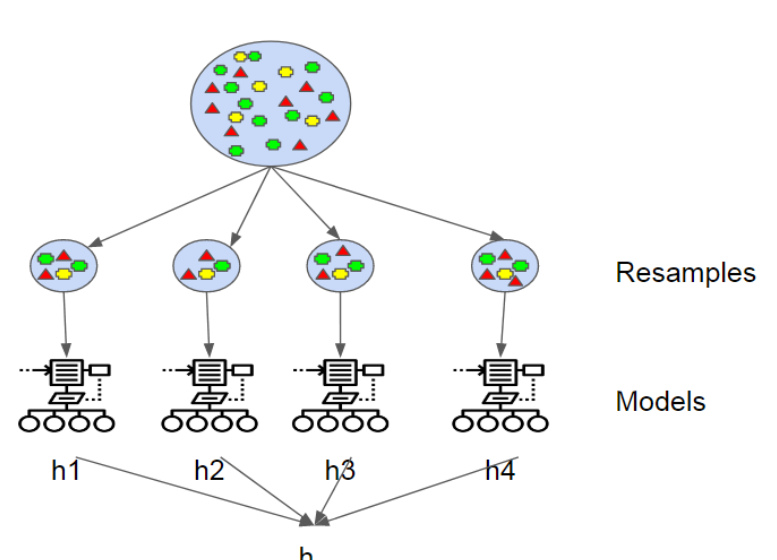

#### Random Forset
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

In [14]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intiate the model
random_forset = RandomForestClassifier(n_estimators=100)
# Fit the Model
random_forset.fit(X_train, y_train) 
# Predict for testing
random_forset_predict = random_forset.predict(X_test)
# Let's see the perforamce of our Model using the Cross Validation Method
cv_results_random_forest = pd.DataFrame(cross_validate(random_forset, X, y, cv=4, return_train_score = True, scoring=('accuracy', 'precision', 'recall', 'f1')))
# View the results
cv_results_random_forest.head()

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.33610487,0.03263235,0.75520833,1.0,0.66129032,1.0,0.61194030,1.0,0.63565891,1.0
1,0.33660579,0.03299999,0.71354167,1.0,0.60344828,1.0,0.52238806,1.0,0.56000000,1.0
2,0.33065343,0.01568007,0.79166667,1.0,0.75471698,1.0,0.59701493,1.0,0.66666667,1.0
3,0.37728167,0.01947379,0.79687500,1.0,0.75000000,1.0,0.62686567,1.0,0.68292683,1.0


You may have notice that the the fit time is quiet high compared to the decison trees so, another implementation was proposed

##### ExtraTrees

In [15]:
# Import ExtraTrees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# Intiate the model
extra_tree = ExtraTreesClassifier(n_estimators=100)
# Fit the Model
extra_tree.fit(X_train, y_train) 
# Predict for testing
extra_tree_predict = extra_tree.predict(X_test)
# Let's see the perforamce of our Model using the Cross Validation Method
cv_results_extra_tree = pd.DataFrame(cross_validate(extra_tree, X, y, cv=4, return_train_score = True, scoring=('accuracy', 'precision', 'recall', 'f1')))
# View the results
cv_results_extra_tree.head()

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.26814675,0.03335333,0.79166667,1.0,0.72881356,1.0,0.64179104,1.0,0.68253968,1.0
1,0.29072356,0.03424048,0.69791667,1.0,0.57627119,1.0,0.50746269,1.0,0.53968254,1.0
2,0.27368665,0.02967644,0.78125000,1.0,0.73584906,1.0,0.58208955,1.0,0.65000000,1.0
3,0.28093648,0.01928282,0.75520833,1.0,0.70833333,1.0,0.50746269,1.0,0.59130435,1.0


### Grid Search
You may have noticed that there is a lot of hyperparameter to tune and select the best one amonst them. A good way to do so is to use GridSearchCV which will search accross set of values and return the best one. 
Now, let's use it with Decision Tree

In [43]:
# Import grid search 
from sklearn.model_selection import GridSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, 6],
              "max_features": list(range(1, 9)),
              "min_samples_leaf": list(range(1,9)),
              "criterion": ["gini", "entropy"]}

# Instantiate grid search object
dtree_gs = GridSearchCV(dtree, param_dist, cv=5, return_train_score=True)

# Fit the grid search object
dtree_gs.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dtree_gs.best_params_))
print("Best score is {}".format(dtree_gs.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 7}
Best score is 0.7578643578643578


In [46]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()


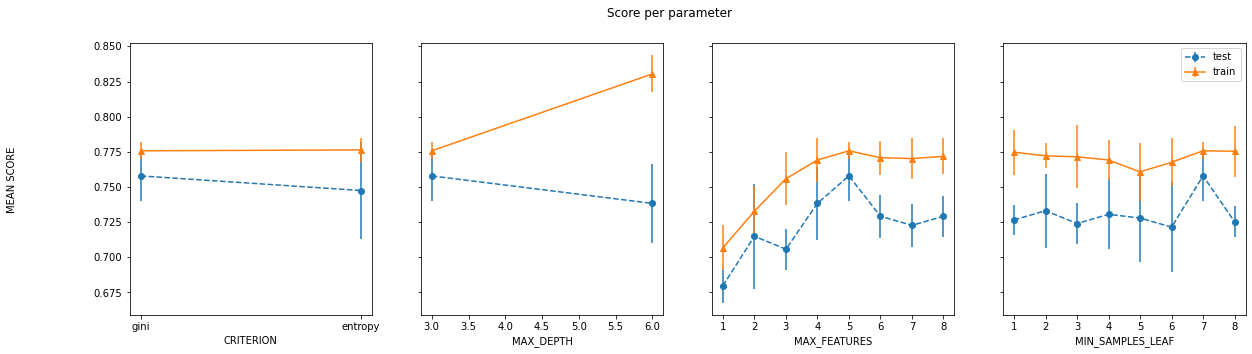

In [47]:
plot_search_results(dtree_gs)

In [34]:
dtree_gs.cv_results_

{'mean_fit_time': array([0.00046625, 0.00162888, 0.00039921, 0.00081844, 0.00029111,
        0.00189867, 0.00061231, 0.00034399, 0.00039921, 0.0006074 ,
        0.00020652, 0.00162249, 0.00019774, 0.        , 0.        ,
        0.00019875, 0.00180078, 0.00163693, 0.00092945, 0.00100522,
        0.00208859, 0.00062747, 0.00322986, 0.00142965, 0.00121307,
        0.00019956, 0.00167174, 0.00153255, 0.00019994, 0.00482869,
        0.00179873, 0.00165448, 0.00053897, 0.00475488, 0.00268202,
        0.0035429 , 0.00403271, 0.00264668, 0.00203996, 0.0032568 ,
        0.00050945, 0.00020061, 0.0026103 , 0.00294886, 0.00303831,
        0.00461464, 0.0034173 , 0.00180001, 0.00041122, 0.00275583,
        0.00235028, 0.00242472, 0.00332484, 0.00326328, 0.00389628,
        0.        , 0.00322928, 0.00241184, 0.00360384, 0.00161438,
        0.00459032, 0.00159898, 0.00327182, 0.00455227, 0.00065517,
        0.00226159, 0.00021076, 0.00180602, 0.00181336, 0.00320897,
        0.00159883, 0.00324273,

Now, Let's give it a try with RandomForset

In [26]:
# Create Prameter Distribution : random_forest_params
random_forest_params = { 'n_estimators' : [100, 150, 200], 
                         "criterion": ["gini", "entropy"], 
                         "max_depth": [3, 7, 10],
                         "min_samples_leaf": list(range(1,9))}
# Instantiate grid search object
random_forest_gs = GridSearchCV(random_forset, random_forest_params, cv=5)

# Fit the grid
random_forest_gs.fit(X, y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(random_forest_gs.best_params_))
print("Best score is {}".format(random_forest_gs.best_score_))

Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 200}
Best score is 0.7786458333333334


### RandomizedSearch
GridSearch is nothing but applying your model several times and get the best parameters but this process is very computationally expensive so Randomized Search was implemented it applies the model through a random set of parameters not to apply them all and this is less consuming. Now, let's apply this to the Decision tree and see the difference in paramenters and then compare the excution time.


In [27]:
# Import grid search 
from sklearn.model_selection import RandomizedSearchCV


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": list(range(1, 9)),
              "min_samples_leaf": list(range(1,9)),
              "criterion": ["gini", "entropy"]}

# Instantiate grid search object
dtree_rs = RandomizedSearchCV(dtree, param_dist, cv=5)

# Fit the grid search object
dtree_rs.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dtree_rs.best_params_))
print("Best score is {}".format(dtree_rs.best_score_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 5, 'max_features': 4, 'max_depth': 3, 'criterion': 'gini'}
Best score is 0.7395833333333334


In [35]:
# Now, let's compare excution time
# Import timeit
import timeit
# Timing for Grid search
%%timeit
dtree_gs.fit(X, y)

c:\users\ahmed.abuelkhir\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\ahmed.abuelkhir\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\ahmed.abuelkhir\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.

2.65 s ± 388 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
# Timing for Randomized search
%%timeit
dtree_rs.fit(X, y)

c:\users\ahmed.abuelkhir\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


97.8 ms ± 5.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
